In [116]:
from PIL import Image
import os

from keras.src.backend import shape

folder_pizza = "/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test/pizza"
files = os.listdir(folder_pizza)

filepath = os.path.join(folder_pizza, files[0])

img = Image.open(filepath)



folder_steak = "/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test/steak"
files = os.listdir(folder_steak)

filepath = os.path.join(folder_steak, files[0])

img = Image.open(filepath)


folder_sushi = "/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test/sushi"
files = os.listdir(folder_sushi)

filepath = os.path.join(folder_sushi, files[0])

img = Image.open(filepath)

In [126]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])



train_dataset = datasets.ImageFolder("/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/train",train_transform)

test_dataset = datasets.ImageFolder("/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/pizza_steak_sushi/test",test_transform)


train_loader = DataLoader(train_dataset, batch_size=1,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1,shuffle=True)

In [135]:
for X_eval, y_eval in test_loader:
    print(X_eval.shape, y_eval)

torch.Size([3, 3, 224, 224]) tensor([2, 0, 0])
torch.Size([3, 3, 224, 224]) tensor([2, 0, 2])
torch.Size([3, 3, 224, 224]) tensor([0, 0, 1])
torch.Size([3, 3, 224, 224]) tensor([2, 2, 0])
torch.Size([3, 3, 224, 224]) tensor([2, 0, 2])
torch.Size([3, 3, 224, 224]) tensor([2, 0, 1])
torch.Size([3, 3, 224, 224]) tensor([0, 0, 1])
torch.Size([3, 3, 224, 224]) tensor([2, 1, 0])
torch.Size([3, 3, 224, 224]) tensor([2, 1, 2])
torch.Size([3, 3, 224, 224]) tensor([2, 2, 1])
torch.Size([3, 3, 224, 224]) tensor([1, 2, 0])
torch.Size([3, 3, 224, 224]) tensor([0, 1, 2])
torch.Size([3, 3, 224, 224]) tensor([1, 0, 2])
torch.Size([3, 3, 224, 224]) tensor([0, 1, 2])
torch.Size([3, 3, 224, 224]) tensor([2, 1, 1])
torch.Size([3, 3, 224, 224]) tensor([2, 0, 2])
torch.Size([3, 3, 224, 224]) tensor([0, 2, 0])
torch.Size([3, 3, 224, 224]) tensor([1, 2, 0])
torch.Size([3, 3, 224, 224]) tensor([1, 1, 0])
torch.Size([3, 3, 224, 224]) tensor([0, 2, 1])
torch.Size([3, 3, 224, 224]) tensor([2, 0, 2])
torch.Size([3

In [118]:
import torch
from torch import nn


class ImageModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.cov_layer_one = nn.Conv2d(in_channels=3,out_channels=124,kernel_size=10,stride=1,padding=1)
        self.activation_one = nn.ReLU()
        self.cov_layer_two = nn.Conv2d(in_channels=124,out_channels=62,kernel_size=5,stride=1,padding=1)
        self.activation_two = nn.ReLU()

        self.pool = nn.AdaptiveAvgPool2d((24, 24))

        self.flat = nn.Flatten()

        self.linear_layer_one = nn.Linear(in_features=62*24*24,out_features=32)
        self.activation_three = nn.ReLU()
        self.linear_layer_two = nn.Linear(in_features=32,out_features=3)

    def forward(self,x):
        return self.linear_layer_two(self.activation_three(self.linear_layer_one(self.flat(self.pool(self.activation_two(self.cov_layer_two(self.activation_one(self.cov_layer_one(x)))))))))


In [119]:
model_0 = ImageModel()

In [120]:
loss_fn = nn.CrossEntropyLoss()

In [121]:
optimizer = torch.optim.Adam(model_0.parameters(),lr = 0.1)

In [129]:
epoch = 1
i = 0
x_point = []
y_loss = []

for epoch in range(epoch):

    for X_train_batch, y_train_batch in train_loader:

        y_pred = model_0(X_train_batch)

        loss = loss_fn(y_pred,y_train_batch)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        x_point.append(i)
        y_loss.append(loss.item())

        i = i + 1

        if epoch % 1 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.0736061334609985
Epoch 0, Loss: 1.1442819833755493
Epoch 0, Loss: 1.0612889528274536
Epoch 0, Loss: 1.0225558280944824
Epoch 0, Loss: 15.754030227661133
Epoch 0, Loss: 1.0824010372161865
Epoch 0, Loss: 1.1486330032348633
Epoch 0, Loss: 1.1245102882385254
Epoch 0, Loss: 1.0797351598739624
Epoch 0, Loss: 1.144345998764038
Epoch 0, Loss: 1.0939526557922363
Epoch 0, Loss: 1.1465758085250854
Epoch 0, Loss: 1.1138654947280884
Epoch 0, Loss: 1.1479170322418213
Epoch 0, Loss: 0.9731503129005432


In [131]:
import matplotlib.pyplot as plt

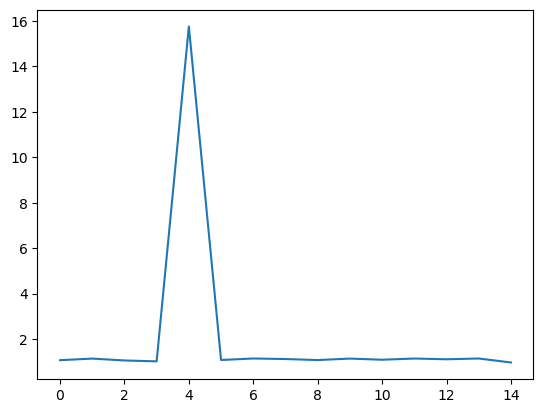

In [130]:
plt.plot(x_point,y_loss)

In [134]:
model_0.eval()

for x_eval, y_eval in test_loader:

    y_logits = model_0(x_eval)

    y_prob = torch.softmax(y_logits,dim=1)

    _, y_pred = torch.max(y_prob,dim = 1)

    one_hot = torch.nn.functional.one_hot(y_pred, num_classes=3)

    print(f"Probabilities: {y_prob.tolist()}, One hot:{one_hot},  Predictions {y_pred}, Index of list True: {y_eval}")


tensor([[[[0.1490, 0.1451, 0.1059,  ..., 0.6392, 0.6275, 0.6196],
          [0.1216, 0.1216, 0.1020,  ..., 0.6235, 0.6314, 0.6196],
          [0.1608, 0.1451, 0.1373,  ..., 0.6157, 0.6314, 0.6196],
          ...,
          [0.5098, 0.5098, 0.5176,  ..., 0.0980, 0.1490, 0.1137],
          [0.4471, 0.4471, 0.4471,  ..., 0.1569, 0.1373, 0.1059],
          [0.3765, 0.3647, 0.3529,  ..., 0.1647, 0.1569, 0.1059]],

         [[0.1765, 0.1843, 0.1725,  ..., 0.8275, 0.8235, 0.8157],
          [0.1804, 0.1843, 0.1843,  ..., 0.8157, 0.8275, 0.8196],
          [0.2039, 0.1804, 0.1765,  ..., 0.8157, 0.8314, 0.8235],
          ...,
          [0.4784, 0.4745, 0.4667,  ..., 0.2157, 0.2941, 0.2431],
          [0.3961, 0.3922, 0.3882,  ..., 0.3020, 0.2588, 0.2039],
          [0.3529, 0.3490, 0.3412,  ..., 0.3647, 0.3059, 0.2196]],

         [[0.2824, 0.2745, 0.2510,  ..., 0.9216, 0.9176, 0.9098],
          [0.2902, 0.2784, 0.2706,  ..., 0.9216, 0.9294, 0.9216],
          [0.3255, 0.2902, 0.2863,  ..., 0